# Creating Toy Datasets

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline

from tensorflow.python.keras import backend as K

Python is a great tool to create datapoints and illustrate them. This is a good exercise to get to know datasets and their structure.

In [2]:
# creating X and Y coordinates using linspace and np.sin
X_train = np.atleast_2d(np.linspace(0, 30, 100, dtype=np.float32)).T
#based on X create Y coordinates using the Sinus function and add some random generated noise
y_train = np.sin(X_train) + np.atleast_2d(np.random.normal(0, 0.05, size=100).astype(np.float32)).T

# Checking the Shape of the created Dataset
print(X_train.shape)
print(y_train.shape)

(100, 1)
(100, 1)


Plotting the created datapoints using matplotlib. We import the pyplot function as 'plt' for more convenience. Then its just a matter of plotting x and y. 
Read the documentation to change up the plot, or plot multiple functions in one plot:
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html

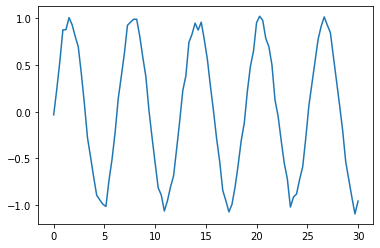

In [3]:
import matplotlib.pyplot as plt
plt.plot(X_train,y_train)

Exersice: Create the Toy Dataset with noise and plot it. Do also plot the normal sinus/cosinus/ whatever function you decided to use without noise in one plot using different plot styles.

## Working with Data

Understanding the dataset that you want to use is of the highest importance. Here Python has some great packages that help you understand and visualize said data. 

The first one you already might be familiar with is numpy. Numpy gives you the ability to work with arrays and gives you all the functions to prepare, use and understand this data.

lets look at a dataset that is widely used for different regression and classification problems. 

In [1]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

Boston Housing is as the name suggests all about housing prices in Boston. Those prices depend on multiple different variables and they all come as one dataset, lets look at it plain as numpy array :

In [3]:
boston_dataset
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
print(boston_dataset['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


As you see this is not quite what we call viewable, even as numpy arrays. 
Lets use a second package called pandas that makes it easy for us to view and index it as nice arrays.

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now that we can visualize the data nicely we can evaluate it further. Can we find two variables that correlate with each other? That might be helpful to create some linear regression model.

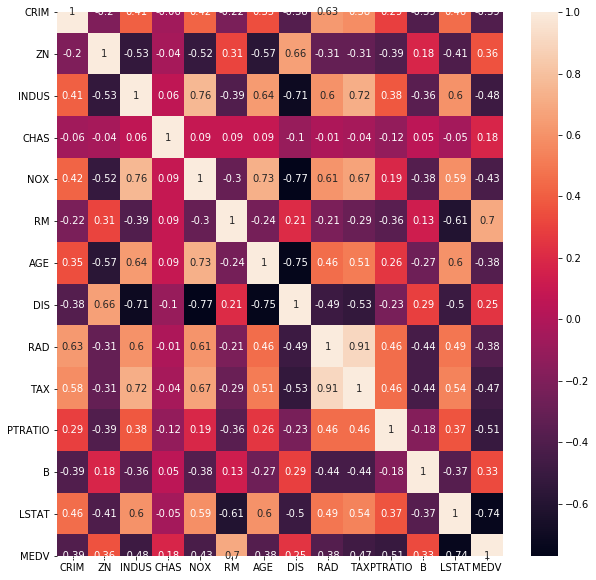

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
figure = plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)

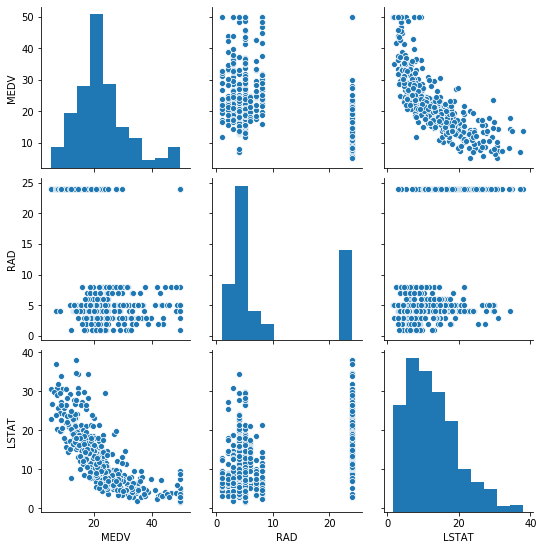

In [26]:
sns.pairplot(data=boston[['MEDV','RAD','LSTAT']])

For the best linear regression model we take a value that corresponds highly with the **MEDV** (Median Value) which is the target we want to predict.

In [17]:
# Choose a X Value that correslates with the MEDV value and convert it to a numpy array
Y = boston['MEDV'].to_numpy()
X = boston['RM'].to_numpy()

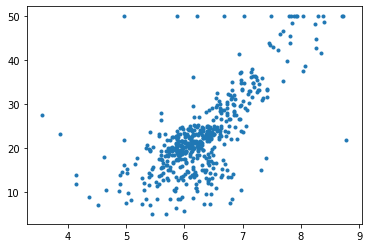

In [19]:
plt.plot(X,Y,'.')

### Some further questions that you can solve using numpy

* What is the mean number of rooms ? 
* Whats the median number of rooms ?
* What is the highes prices house ?

In [18]:
tf.reduce_mean(X)

<tf.Tensor: shape=(), dtype=float64, numpy=6.284634387351779>

In [16]:
np.mean(X)

6.284634387351779

# Banknoten Daten Decision Boundary